<a href="https://colab.research.google.com/github/DenicaKj/VNP/blob/main/fetal_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [55]:
data=pd.read_csv('/content/drive/MyDrive/VNP-Exercises-main/fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


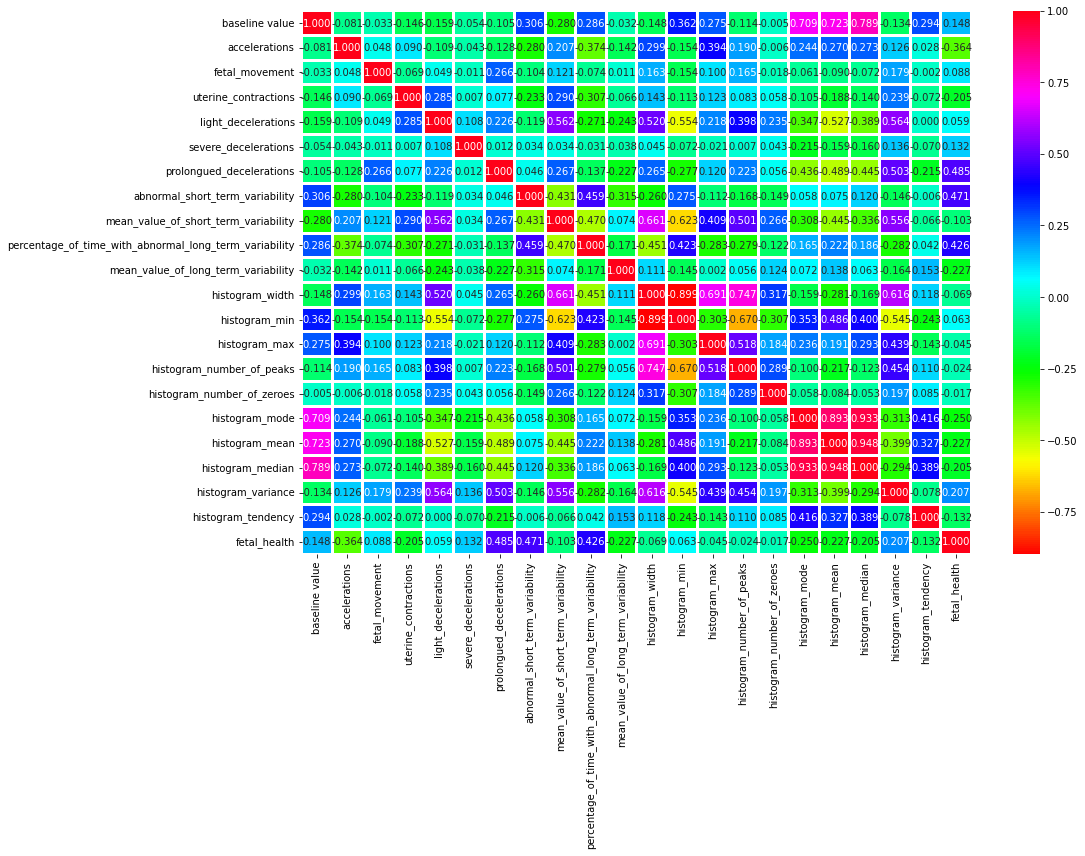

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [57]:
from sklearn.model_selection import train_test_split

X = data.drop(['fetal_health'], axis = 1)
Y = data.fetal_health.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
     

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
     

len(X_train[0])

21

In [59]:
data2=data.drop(["accelerations","histogram_mode","histogram_mean","histogram_median","mean_value_of_long_term_variability","histogram_tendency"],axis=1)

In [60]:
from sklearn.model_selection import train_test_split

X2 = data2.drop(['fetal_health'], axis = 1)
Y2 = data2.fetal_health.values

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)

In [61]:
sc = StandardScaler()

X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)
     

len(X_train2[0])

15

In [62]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy
import keras

In [63]:
y_train_cat = tf.keras.utils.to_categorical(numpy.array(Y_train),4)

In [64]:
y_train_cat

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model1 = Sequential()
model1.add(Dense(128, input_dim=21, kernel_initializer='uniform', activation='relu'))
model1.add(Dropout(0.1, input_shape=(128,)))
model1.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model1.add(Dropout(0.1, input_shape=(64,)))
model1.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model1.add(Dropout(0.1, input_shape=(32,)))
model1.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model1.add(Dense(4, kernel_initializer='uniform', activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [66]:
history1=model1.fit(X_train, y_train_cat, epochs=200, batch_size=15) 

Epoch 1/200
114/114 [==============================] - 1s 3ms/step - loss: 0.7765 - accuracy: 0.7788
Epoch 2/200
114/114 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.7894
Epoch 3/200
114/114 [==============================] - 0s 3ms/step - loss: 0.3454 - accuracy: 0.8476
Epoch 4/200
114/114 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8665
Epoch 5/200
114/114 [==============================] - 0s 3ms/step - loss: 0.2560 - accuracy: 0.8865
Epoch 6/200
114/114 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.8847
Epoch 7/200
114/114 [==============================] - 0s 3ms/step - loss: 0.2384 - accuracy: 0.8894
Epoch 8/200
114/114 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.8918
Epoch 9/200
114/114 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9112
Epoch 10/200
114/114 [==============================] - 0s 2ms/step - loss: 0.2134 - accura

In [67]:
y_pred1 = model1.predict(X_test) 

14/14 [==============================] - 0s 2ms/step


In [68]:
y_pred1=numpy.argmax(y_pred1,axis=1)

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

ac = accuracy_score(Y_test, y_pred1)
print('accuracy of the model: ', ac)

accuracy of the model:  0.9131455399061033


In [80]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred1)

0.6753731343283582

In [70]:
model2 = Sequential()
model2.add(Dense(128, input_dim=15, kernel_initializer='uniform', activation='relu'))
model2.add(Dropout(0.1, input_shape=(128,)))
model2.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model2.add(Dropout(0.1, input_shape=(64,)))
model2.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model2.add(Dropout(0.1, input_shape=(32,)))
model2.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(4, kernel_initializer='uniform', activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [71]:
y_train_cat2 = tf.keras.utils.to_categorical(numpy.array(Y_train2),4)

In [72]:
history2=model2.fit(X_train2, y_train_cat2, epochs=200, batch_size=15) 

Epoch 1/200
114/114 [==============================] - 1s 3ms/step - loss: 0.8368 - accuracy: 0.7729
Epoch 2/200
114/114 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.7818
Epoch 3/200
114/114 [==============================] - 1s 8ms/step - loss: 0.4218 - accuracy: 0.7853
Epoch 4/200
114/114 [==============================] - 1s 8ms/step - loss: 0.3881 - accuracy: 0.8247
Epoch 5/200
114/114 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.8682
Epoch 6/200
114/114 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.8676
Epoch 7/200
114/114 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8765
Epoch 8/200
114/114 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8847
Epoch 9/200
114/114 [==============================] - 0s 3ms/step - loss: 0.2931 - accuracy: 0.8847
Epoch 10/200
114/114 [==============================] - 0s 3ms/step - loss: 0.2926 - accura

In [74]:
y_pred2 = model2.predict(X_test2) 

14/14 [==============================] - 0s 2ms/step


In [75]:
y_pred2=numpy.argmax(y_pred2,axis=1)

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

ac = accuracy_score(Y_test2, y_pred2)
print('accuracy of the model: ', ac)

accuracy of the model:  0.9131455399061033


In [79]:
from sklearn.metrics import r2_score
r2_score(Y_test2, y_pred2)

0.6753731343283582